In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./bases/suicide/master_correcao.csv") 
dfsuicides = df.pivot_table('suicides', ['country'], 'year')
dfsuicides = dfsuicides.interpolate(method='linear',limit_direction='both', axis=1)
dfsuicides


year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,
Albania,54.0,119.0,133.000000,124.000000,146.000000,0.000000,0.00,124.0,160.0,0.0,96.0,96.0,96.0,96.0,96.0,96.0
Antigua and Barbuda,2.0,2.0,0.000000,1.000000,2.000000,0.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Argentina,2774.0,3132.0,3162.000000,3289.000000,3121.000000,3058.000000,3108.00,2946.0,3059.0,2884.0,2943.0,2912.0,3248.0,2987.0,3231.0,3073.0
Armenia,61.0,60.0,74.000000,59.000000,65.333333,71.666667,78.00,71.0,63.0,53.0,73.0,67.0,79.0,67.0,58.0,74.0
Aruba,10.0,4.0,9.000000,2.000000,8.000000,10.000000,9.00,8.0,4.0,4.0,7.0,9.0,9.0,9.0,9.0,9.0
Australia,2391.0,2458.0,2319.000000,2156.000000,2114.000000,2115.500000,2117.00,2229.0,2341.0,2337.0,2420.0,2392.0,2580.0,2608.0,2891.0,3027.0
Austria,1588.0,1489.0,1553.000000,1456.000000,1422.000000,1399.000000,1297.00,1285.0,1267.0,1278.0,1264.0,1288.0,1276.0,1291.0,1314.0,1251.0
Bahamas,11.0,1.0,3.000000,1.000000,2.000000,4.000000,2.00,5.0,4.0,6.0,10.0,4.0,5.0,5.0,5.0,5.0
Bahrain,29.0,23.0,25.000000,34.000000,42.000000,42.000000,28.00,40.0,43.0,36.0,19.0,18.0,19.0,5.0,9.0,9.0


In [3]:
dfpopulation = df.pivot_table('population', ['country'], 'year')
dfpopulation = dfpopulation.interpolate(method='linear', limit_direction ='backward', axis=1)


In [4]:
dfpopulation = pd.melt(dfpopulation.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="population")
dfsuicides = pd.melt(dfsuicides.reset_index(), id_vars=["country"], 
                  var_name="year", value_name="suicides")
dffinal = dfpopulation.merge(dfsuicides).sort_values(['country','year']).reset_index(drop=True)
dffinal['suicides100'] = (dffinal['suicides'] * 100000 ) / dffinal['population']

In [5]:
unico = dffinal['country'].unique()

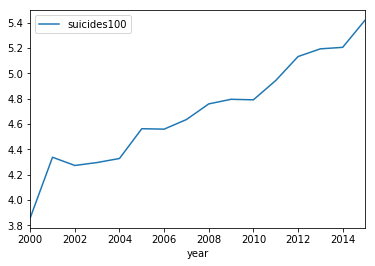

In [6]:
fig, ax = plt.subplots()
dffinal.where(dffinal.country=='Brazil').plot(x='year', y='suicides100', ax=ax)
#plt.plot(data=dfsuicide100, marker='o', markerfacecolor='olive', color='y', linewidth=2, markersize=4)

In [7]:
df2 = pd.read_csv("./bases/wdi/Indicators.csv")


In [8]:
filtro = df2.IndicatorCode.isin(['SP.DYN.LE00.IN','SP.DYN.LE00.FE.IN','SP.DYN.LE00.MA.IN', 'BX.TRF.PWKR.CD.DT','SP.POP.GROW','SP.DYN.CBRT.IN','NY.GNP.MKTP.CD', 'IC.TAX.PAYM','FP.CPI.TOTL','SL.EMP.MPYR.ZS','GC.XPN.TOTL.CN','SL.TLF.PRIM.ZS'])
filtro3 = df2.Year > 1999 
filtro4 = df2.Year < 2016
df2 = df2[filtro & filtro3 & filtro4]

In [9]:
df2.replace(["Slovak Republic", "Kyrgyz Republic","St. Lucia","Bahamas, The","Korea, Dem. Rep.","St. Vincent and the Grenadines","Russia"], ['Slovakia', 'Kyrgyzstan', 'Saint Lucia', 'Bahamas', 'Republic of Korea', 'Saint Vincent and Grenadines','Russian Federation'], inplace=True)                                 
filtro2 = df2.CountryName.isin(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Lucia', 'Saint Vincent and Grenadines', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay'])
df2 = df2[filtro2].reset_index(drop=True)

In [12]:
#filtro5 = df2.IndicatorCode == 'NY.GNP.MKTP.CD'
filtro5 = df2.Year == 2015
df2[filtro5]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
12248,Albania,ALB,Tax payments (number),IC.TAX.PAYM,2015,34.0
12249,Antigua and Barbuda,ATG,Tax payments (number),IC.TAX.PAYM,2015,57.0
12250,Argentina,ARG,Tax payments (number),IC.TAX.PAYM,2015,9.0
12251,Armenia,ARM,Tax payments (number),IC.TAX.PAYM,2015,10.0
12252,Australia,AUS,Tax payments (number),IC.TAX.PAYM,2015,11.0
12253,Austria,AUT,Tax payments (number),IC.TAX.PAYM,2015,12.0
12254,Bahamas,BHS,Tax payments (number),IC.TAX.PAYM,2015,19.0
12255,Bahrain,BHR,Tax payments (number),IC.TAX.PAYM,2015,13.0
12256,Barbados,BRB,Tax payments (number),IC.TAX.PAYM,2015,28.0
12257,Belarus,BLR,Tax payments (number),IC.TAX.PAYM,2015,7.0
